In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv('household_power_consumption_with_current.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1044506 non-null  float64
 3   Global_reactive_power  1044506 non-null  float64
 4   Voltage                1044506 non-null  float64
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
 9   apparent_power_S       1044506 non-null  float64
 10  current_consumption    1044506 non-null  float64
dtypes: float64(6), object(5)
memory usage: 88.0+ MB


In [28]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")


In [30]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)


C:\Users\chepp\AppData\Local\Temp\ipykernel_16840\3270272793.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)


In [32]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [34]:
# Convert 'Global_intensity', 'Sub_metering_1', and 'Sub_metering_2' to numeric, coercing errors to NaN
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

# Handle missing values by filling with median (since the data can have outliers)
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 
            'apparent_power_S', 'current_consumption', 'Global_intensity']:
    df[col].fillna(df[col].median(), inplace=True)

# Feature Engineering: Extract hour, day, and month from 'Date' and 'Time'
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Extract 'hour', 'day', and 'month' as new features
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Drop 'Date' and 'Time' since they are now represented by new features
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Display the processed data to check the changes
df.head()


C:\Users\chepp\AppData\Local\Temp\ipykernel_16840\3739248934.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,apparent_power_S,current_consumption,Hour,Day,Month
0,4216.0,418.0,234.84,18.4,0.0,1.0,17.0,4236.670863,18.040670,17,16,12
1,5360.0,436.0,233.63,23.0,0.0,1.0,16.0,5377.703599,23.018035,17,16,12
2,5374.0,498.0,233.29,23.0,0.0,2.0,17.0,5397.025106,23.134404,17,16,12
3,5388.0,502.0,233.74,23.0,0.0,1.0,17.0,5411.335140,23.151087,17,16,12
4,3666.0,528.0,235.68,15.8,0.0,1.0,17.0,3703.827750,15.715495,17,16,12


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1048575 non-null  float64
 1   Global_reactive_power  1048575 non-null  float64
 2   Voltage                1048575 non-null  float64
 3   Global_intensity       1048575 non-null  float64
 4   Sub_metering_1         1048575 non-null  float64
 5   Sub_metering_2         1048575 non-null  float64
 6   Sub_metering_3         1048575 non-null  float64
 7   apparent_power_S       1048575 non-null  float64
 8   current_consumption    1048575 non-null  float64
 9   Hour                   1048575 non-null  int32  
 10  Day                    1048575 non-null  int32  
 11  Month                  1048575 non-null  int32  
dtypes: float64(9), int32(3)
memory usage: 84.0 MB


#Time Series Plot (By Hour)

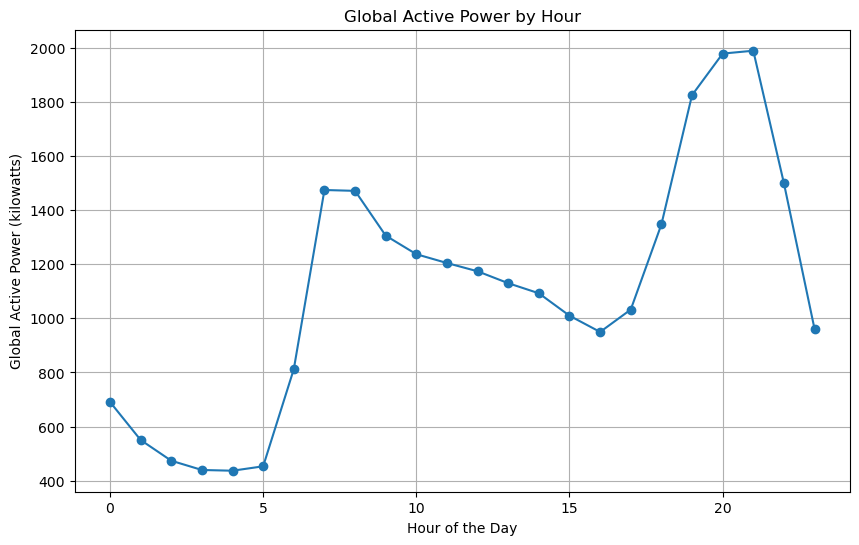

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by 'Hour' and calculate the mean Global Active Power for each hour
hourly_data = df.groupby('Hour')['Global_active_power'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data.values, marker='o')
plt.title('Global Active Power by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()


#Distribution Plot

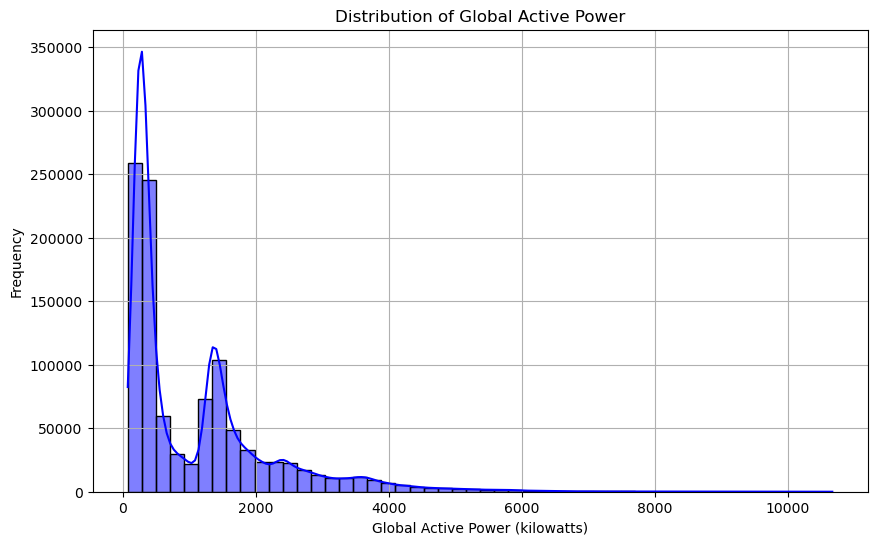

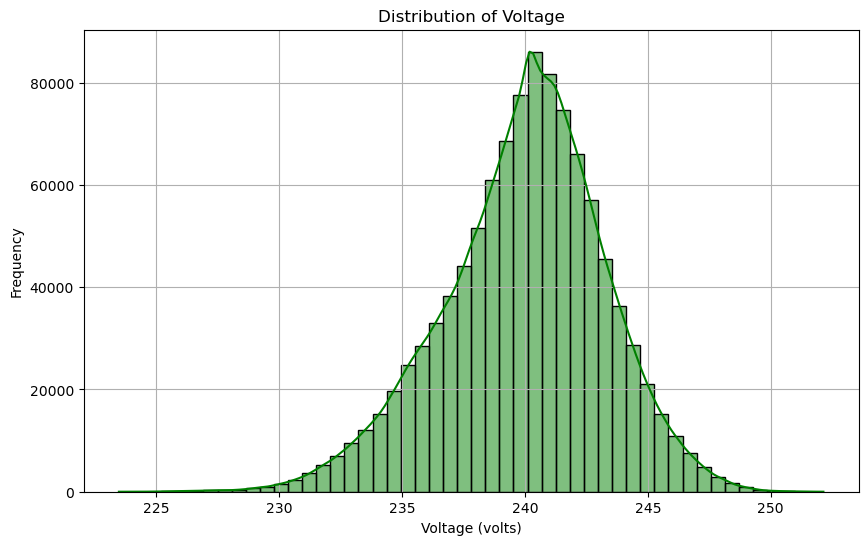

In [39]:
import seaborn as sns
# Distribution of Global Active Power
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='blue')
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Voltage
plt.figure(figsize=(10, 6))
sns.histplot(df['Voltage'], bins=50, kde=True, color='green')
plt.title('Distribution of Voltage')
plt.xlabel('Voltage (volts)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Box Plot of Global_active_power Across Hours

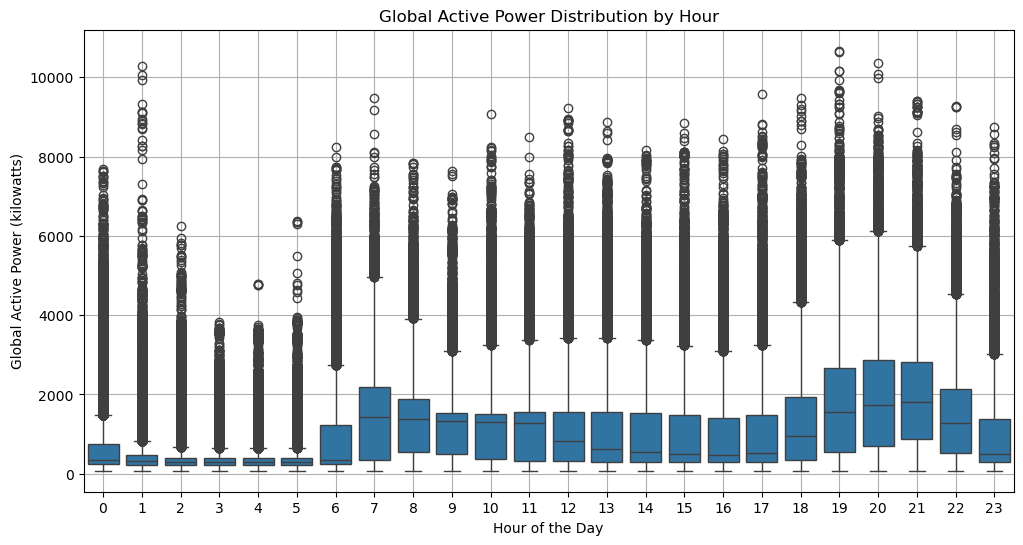

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Global_active_power', data=df)
plt.title('Global Active Power Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Global Active Power (kilowatts)')
plt.grid(True)
plt.show()


#Peak hours current usage

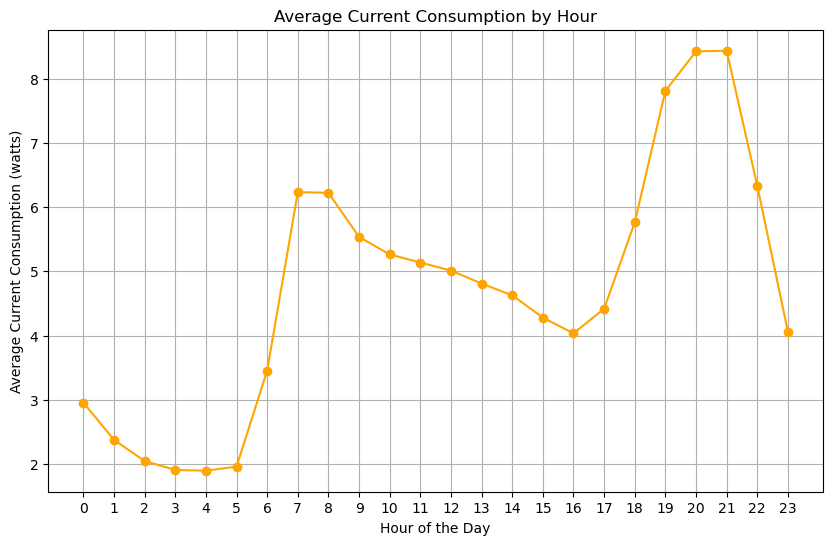

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing the current consumption data
# Group data by 'Hour' and calculate the mean current consumption for each hour
hourly_consumption = df.groupby('Hour')['current_consumption'].mean()

# Plotting the average current consumption by hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_consumption.index, hourly_consumption.values, marker='o', color='orange')
plt.title('Average Current Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Current Consumption (watts)')
plt.xticks(range(0, 24))  # Set x-ticks to show each hour
plt.grid(True)
plt.show()


In [48]:
from sklearn.model_selection import train_test_split

# Define the target variable ('Global_active_power' or 'current_consumption')
target = 'current_consumption'

# Select features (all columns except the target)
features = df.drop(columns=[target])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Display the shapes of the resulting splits to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((838860, 11), (209715, 11), (838860,), (209715,))

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.03821882998523236
Root Mean Squared Error (RMSE): 0.0627003587124916
R-squared (R²): 0.9998265769026935


In [52]:
sample_results = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10]})
print(sample_results)

      Actual  Predicted
0   1.631740   1.588685
1  14.381942  14.431696
2   1.156631   1.154445
3  15.022126  15.027400
4   5.377739   5.371194
5   0.534781   0.494137
6   5.481610   5.486544
7   6.011907   6.030710
8   3.486504   3.555735
9   7.976851   7.995854


#Residual Plots

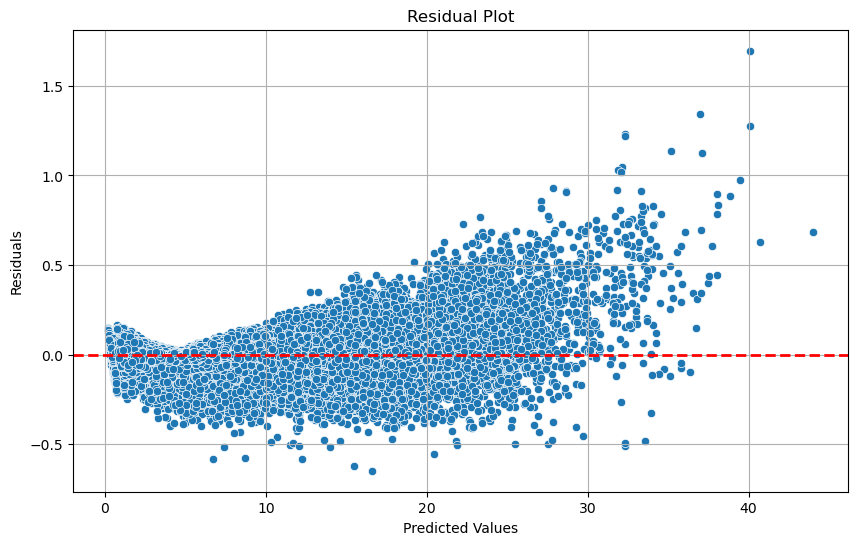

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted values from the model
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Actual vs Predicted Plot

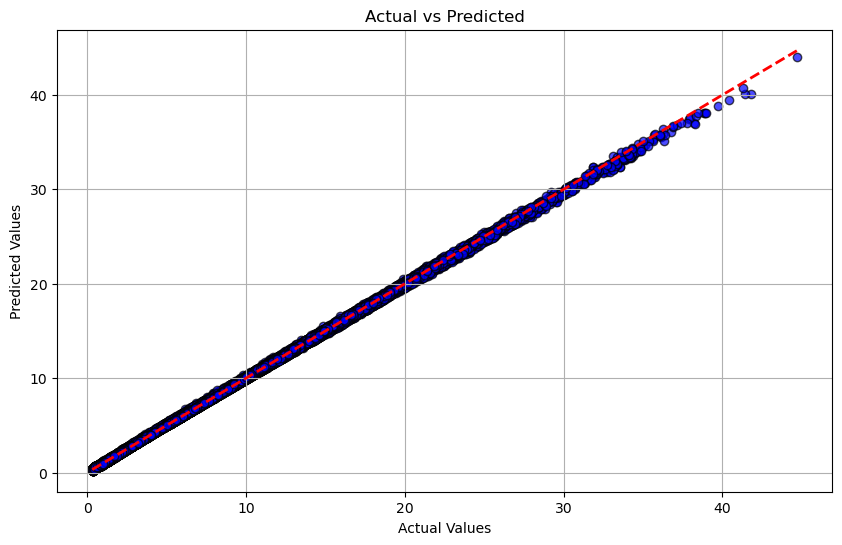

In [58]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)  # Line of perfect prediction
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


Error Distribution Plot

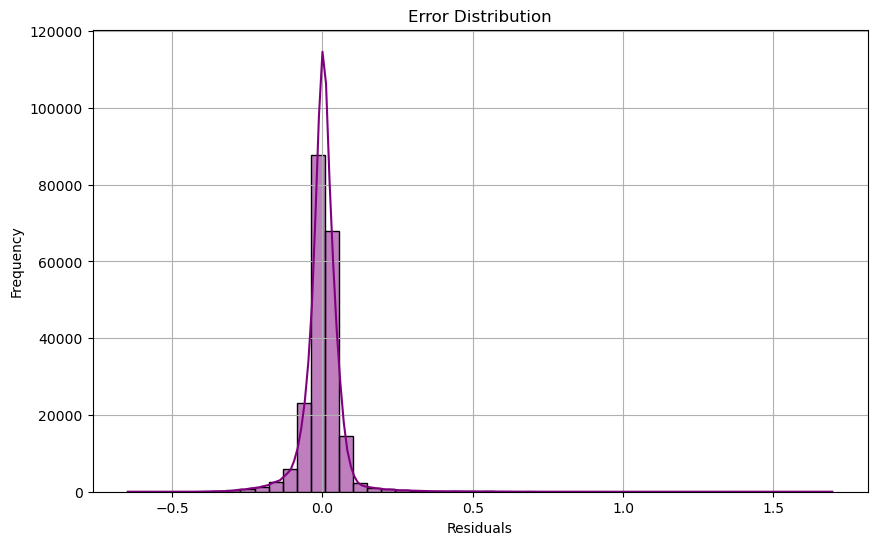

In [61]:
# Error distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=50)
plt.title('Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Scaling the data

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Define the target variable ('Global_active_power' or 'current_consumption')
target = 'current_consumption'

# Select features (all columns except the target)
features = df.drop(columns=[target])

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, df[target], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Cross-validation
cv_scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")


Mean Absolute Error (MAE): 0.03821882998523277
Root Mean Squared Error (RMSE): 0.06270035871249155
R-squared (R²): 0.9998265769026935
Cross-validated scores: [0.99982891 0.99982684 0.9998242  0.99982569 0.99982725]
Mean CV score: 0.9998265772621249
